In [93]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
data = np.genfromtxt('Mall_Customers.csv', delimiter=',', skip_header=1, usecols=(2, 3)) # utiliser que la colonne age et revenu annuel

#Supprimer les lignes contenant des valeurs manquantes
data = data[~np.isnan(data).any(axis=1)]

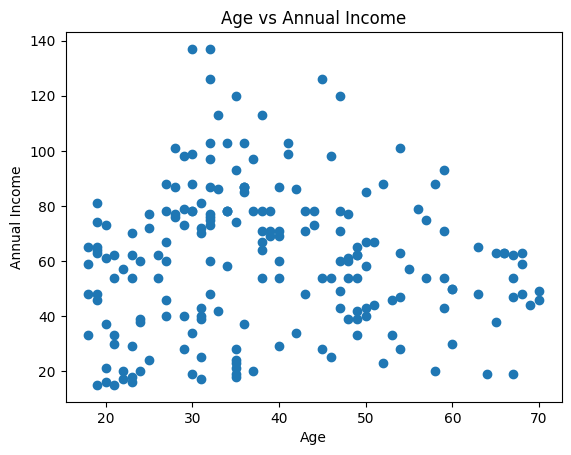

In [95]:
#  Extraire les caractéristiques et tracer les données 
X = data[:, :2]

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs Annual Income')
plt.show()

In [96]:
# Standardiser les données
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

In [97]:
def k_means(X, K, max_iters=100):
    # Initialiser les centroids de manière aléatoire
    centroids = X[np.random.choice(range(X.shape[0]), K, replace=False)]
    
    # Effectuer les itérations jusqu'à atteindre le nombre maxi de ce dernier
    for _ in range(max_iters):
        # Calculer les distances entre chaque point et les centroids
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Assigner chaque point au cluster le plus proche
        clusters = np.argmin(distances, axis=0)
        
        # Mettre à jour les centroids en calculant la moyenne des points dans chaque cluster
        new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(K)])
        
        # Vérifier la convergence en comparant les centroids actuels avec les nouveaux centroids
        if np.all(centroids == new_centroids):
            break
        
        # Mettre à jour les centroids pour la prochaine itération
        centroids = new_centroids
    
    # Retourner les clusters finaux et les centroids qui correspondent a ces derniers
    return clusters, centroids

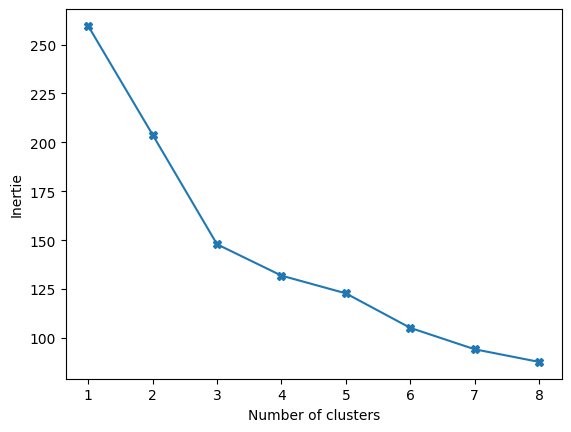

In [98]:
# Déterminer le nombre de clusters
inertie = []
for k in range(1, 9):
    clusters, centroids = k_means(X_normalized, k)
    inertie.append(np.sum(np.sqrt(((X_normalized - centroids[clusters])**2).sum(axis=1))))

# Tracer
plt.plot(range(1, 9), inertie, marker='X')
plt.xlabel('Number of clusters')
plt.ylabel('Inertie')
plt.show()

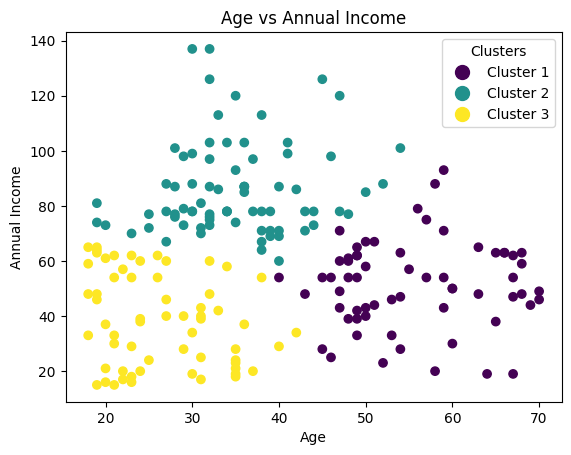

In [99]:
# On va utiliser 3 clusters 
clusters, centroids = k_means(X_normalized, 3)

# Visualiser les clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs Annual Income')

# Créer des repères pour chaque cluster
handles = [plt.Line2D([], [], marker="o", markersize=10, linestyle="", color=color) for color in scatter.to_rgba(np.unique(clusters))]

# Créer une légende
plt.legend(handles, ['Cluster 1', 'Cluster 2', 'Cluster 3'], title='Clusters')

plt.show()
